In [89]:
import sklearn as skl
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
boston_dataset = pd.read_csv("/content/sample_data/Boston.csv")

print(boston_dataset.describe)

X = boston_dataset
X.describe()


n, p = X.shape
n, p
rm = X[:2]

<bound method NDFrame.describe of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     

# **a) El precio minimo es:**


In [30]:
min = np.min(boston_dataset.medv)
print(min)

5.0


# **b) El precio maximo es:**


In [31]:
max = np.max(boston_dataset.medv)
print(max)

50.0


# **c) El precio medio es:**


In [41]:
medio = boston_dataset['medv'].mean()
print(medio)

22.532806324110677


# **d) La desviación estándar.**

In [44]:
desviacion = boston_dataset['medv'].std()
print(desviacion)

9.197104087379818


# **e) ¿Determine si existe alguna relación entre la variable RM y MEDV?**

**RM (Número medio de habitaciones)**


---


**MEDV (Valor medio de la vivienda)**




In [69]:
def relation_rm_medv(rm, means):
  nX = boston_dataset.rm
  nY = boston_dataset.medv
  plt.scatter(nX, nY, alpha=0.3)
  plt.ylabel('Valor medio de la vivienda')
  plt.xlabel('Número de habitaciones')
  plt.show()
  return np.corrcoef(rm, means)[0, 1]


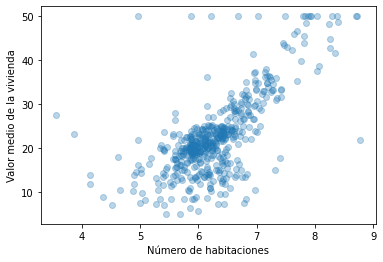

La relación entre RM y MEDV:  0.6953599470715393


In [71]:
print("La relación entre RM y MEDV: ", relation_rm_medv(nX, nY))

**R/** Existe una relación positiva lineal entre la variable RM y MEDV
Tambien podemos observar un punto atipico, que indica que a mayor número de habitaciones, este tendra un valor medio de la vivienda menor, lo que requiere detallar.

**f) ¿Cuál es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 3 y 4 o 5 y 6?**


In [72]:
def precio_medio_3_4(rm, means):
  medios_filtrados = means[np.logical_and(rm >5, rm < 6)]
  return np.mean(medios_filtrados) * 1000

In [73]:
print("El precio medio de las viviendas cuyo número medio de habitaciones oscila entre 3 y 4 es: ", precio_medio_3_4(nX,nY))

El precio medio de las viviendas cuyo número medio de habitaciones oscila entre 3 y 4 es:  17551.5923566879


**g) Si usted realiza histograma del MEDV (Valor medio de la vivienda), identifica algún fenómeno anómalo en la distribución de datos?**

In [81]:
def histograma_medv(medv):
  plt.hist(nY, bins=250)
  plt.show

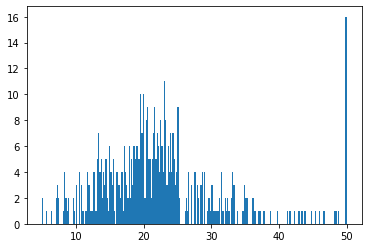

In [82]:
histograma_medv(nY)

Se observa anomalia para cuando el valor medio de la vivienda es mayor a 25, y pienso que es debido al preprocesamiento previo de los datos

**h) Utilice la función “LinearRegression()” de SKlearn para entrenar un modelo de regresión lineal simple que le permita determinar el valor de intersección y la pendiente y explique qué significan estos valores y para que sirven.**

In [106]:
lX = np.array(nX).reshape(-1, 1)
lY = np.array(nY).reshape(-1, 1)

nX.dropna(inplace=True)

lX_train, lX_test, lY_train, lY_test = train_test_split(lX, lY, test_size = 0.25)

regresion_lineal = LinearRegression()

regresion_lineal.fit(lX_train, lY_train)
print(regresion_lineal.score(lX_test, lY_test))

0.495853107195497


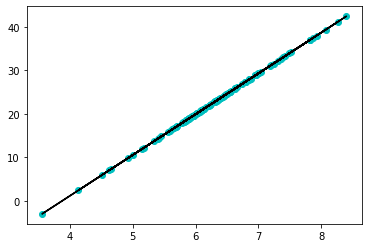

In [107]:
lY_pred = regresion_lineal.predict(lX_test)
plt.scatter(lX_test, lY_pred, color='c')
plt.plot(lX_test, lY_pred, color='k')
plt.show()